In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Input catalogs

In [2]:
best_case = Table.read('/home/aalvarez/Work/Data/WillHartley/NNPZ_run_recomputed.fits')
shifted_case = Table.read('/home/aalvarez/Work/Data/WillHartley/NNPZ_run_shifts.fits')
sample = Table.read('/home/aalvarez/Work/Data/WillHartley/Sample.fits')

In [3]:
np.all(best_case['ID'] == shifted_case['ID'])

True

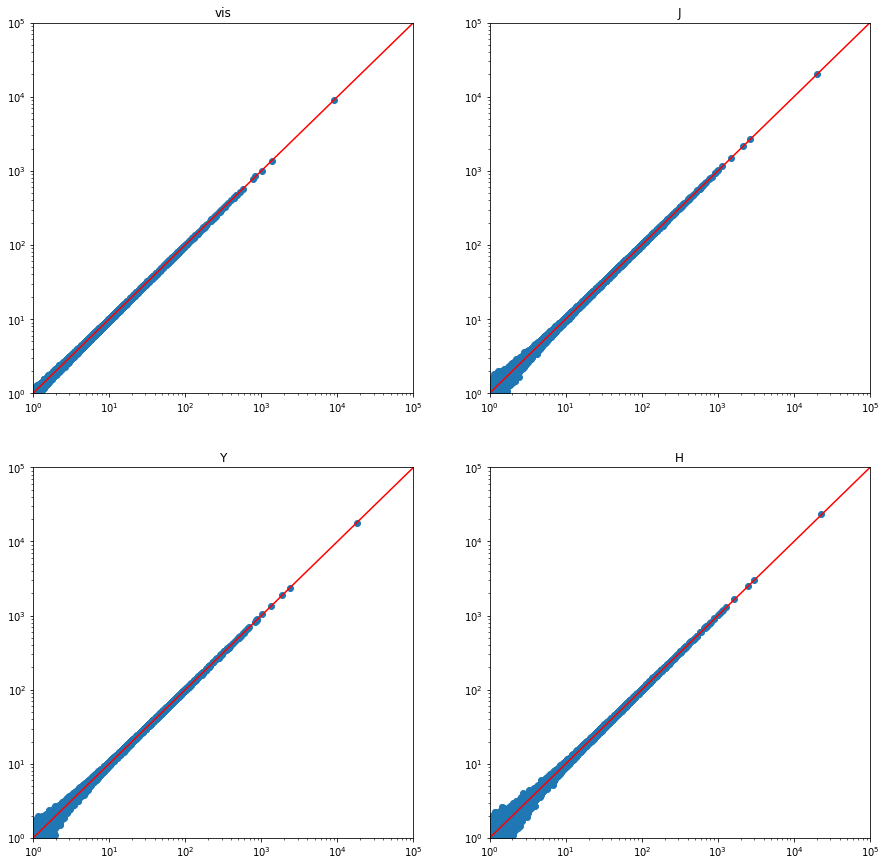

In [4]:
# Fluxes have been recomputed, so they will not be exactly the same, but I want to verify they look like the same sources at least
fig, axes = plt.subplots(2,2,figsize=(15,15))
for i, band in enumerate(['vis', 'Y', 'J', 'H']):
    x = i % 2
    y = i // 2
    axes[x,y].scatter(best_case['Flux_{}'.format(band)], shifted_case['Flux_{}'.format(band)])
    axes[x,y].plot([0, 1e5], [0, 1e5], c='r')
    axes[x,y].set_xscale('log')
    axes[x,y].set_yscale('log')
    axes[x,y].set_xlim(1, 1e5)
    axes[x,y].set_ylim(1, 1e5)
    axes[x,y].set_title(band)
plt.show()

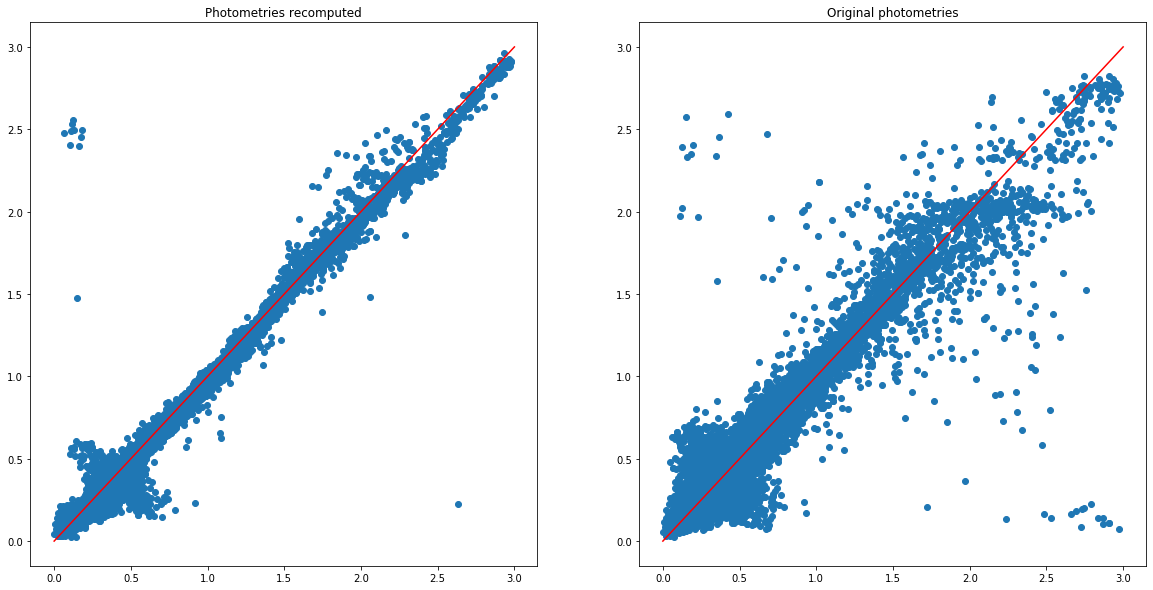

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(sample['z'], best_case['REDSHIFT_MEDIAN'])
axes[0].set_title('Photometries recomputed')
axes[0].plot([0, 3], [0,3], c='r')
axes[1].scatter(sample['z'], shifted_case['REDSHIFT_MEDIAN'])
axes[1].set_title('Original photometries')
axes[1].plot([0, 3], [0,3], c='r')
plt.show()

# Compare best neighbors in ideal scenario, with best neighbors in shifted one

In [6]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [7]:
best_sorted = np.take_along_axis(best_case['NEIGHBOR_IDS'], np.flip(np.argsort(best_case['NEIGHBOR_WEIGHTS'])), axis=-1)

In [8]:
shift_sorted = np.take_along_axis(shifted_case['NEIGHBOR_IDS'], np.flip(np.argsort(shifted_case['NEIGHBOR_WEIGHTS'])), axis=-1)

In [9]:
matches = first_nonzero(best_sorted - shift_sorted, axis=-1, invalid_val=best_sorted.shape[1])

In [10]:
bins = np.arange(-0.5, 30.6, 1)

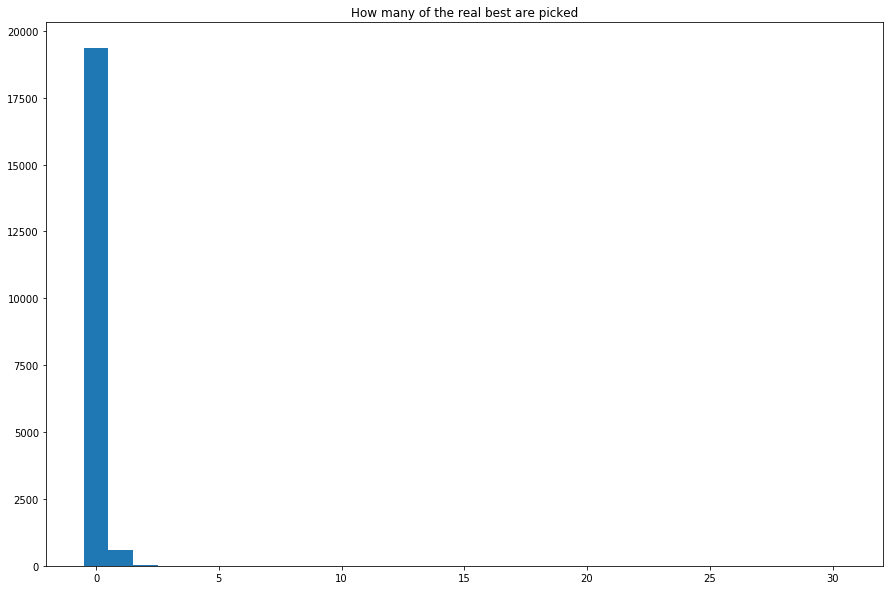

In [11]:
plt.figure(figsize=(15,10))
plt.hist(matches, bins=bins)
plt.title('How many of the real best are picked')
plt.show()

In [12]:
best_ids_sorted = np.flip(np.sort(best_case['NEIGHBOR_IDS']))
shifted_ids_sorted = np.flip(np.sort(shifted_case['NEIGHBOR_IDS']))

In [13]:
match_ids = first_nonzero(best_ids_sorted - shifted_ids_sorted, axis=-1, invalid_val=-1)+1

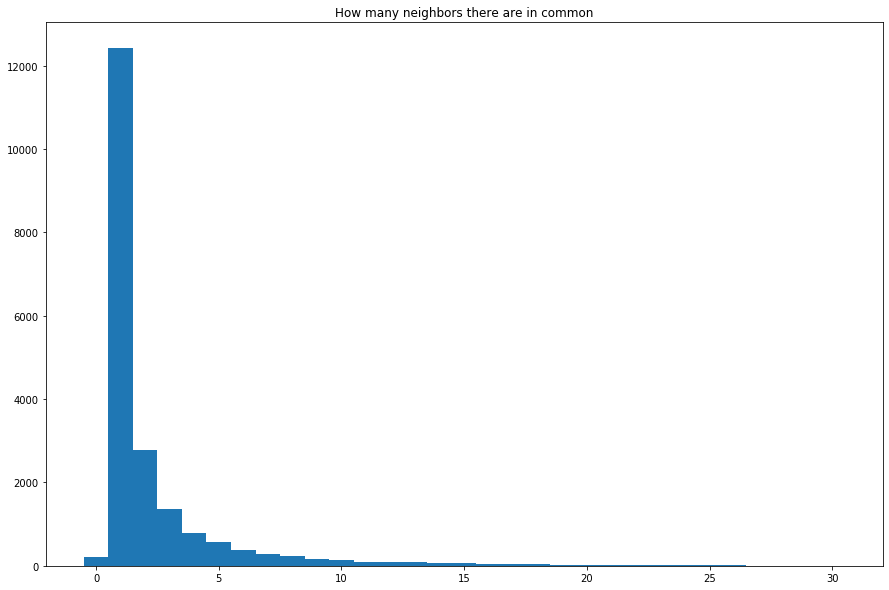

In [14]:
plt.figure(figsize=(15,10))
plt.title('How many neighbors there are in common')
plt.hist(match_ids, bins=bins)
plt.show()